In [16]:
!git clone https://github.com/talhaanwar219/-Age-And-Gender-Detection.git
%cd Age-And-Gender-Detection

Cloning into 'view?usp=sharing'...
fatal: unable to update url base from redirection:
  asked for: https://drive.google.com/file/d/1pzic9sx-oAcJzscYEXILaDsN2Norq2F8/view?usp=sharing/info/refs&service=git-upload-pack
   redirect: https://accounts.google.com/v3/signin/identifier?dsh=S-335430438%3A1686511208326477&continue=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1pzic9sx-oAcJzscYEXILaDsN2Norq2F8%2Fview%3Fusp%3Dsharing%2Finfo%2Frefs%26service%3Dgit-upload-pack&ffgf=1&followup=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1pzic9sx-oAcJzscYEXILaDsN2Norq2F8%2Fview%3Fusp%3Dsharing%2Finfo%2Frefs%26service%3Dgit-upload-pack&ifkv=Af_xneEPNiHwW4RMThWdhgO9RkKb5amcKsHBaKRaE4UrFd0Zluue7XHMjzIT5_9X55E8dTm3uDpi5w&osid=1&passive=1209600&service=wise&flowName=WebLiteSignIn&flowEntry=ServiceLogin
[Errno 2] No such file or directory: 'Age-And-Gender-Detection'
/content/Age-And-Gender-Detection


# Downloading pretrained data and unzipping it

In [21]:
!gdown https://drive.google.com/u/0/uc?id=1pzic9sx-oAcJzscYEXILaDsN2Norq2F8&export=download
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/u/0/uc?id=1pzic9sx-oAcJzscYEXILaDsN2Norq2F8
To: /content/Age-And-Gender-Detection/modelNweight.zip
100% 86.2M/86.2M [00:01<00:00, 58.0MB/s]
Archive:  modelNweight.zip
replace modelNweight/age_deploy.prototxt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Import required modules**

In [22]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

In [23]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

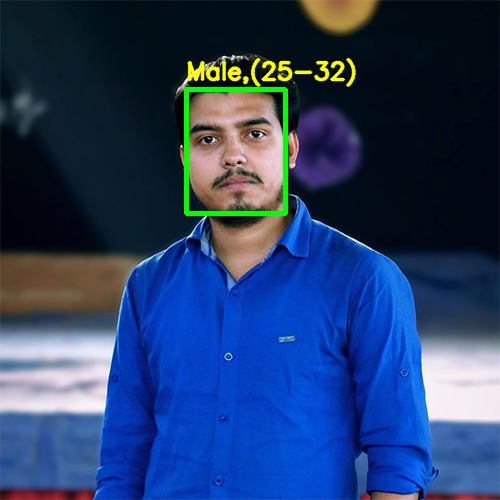

In [24]:
input = cv.imread("1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

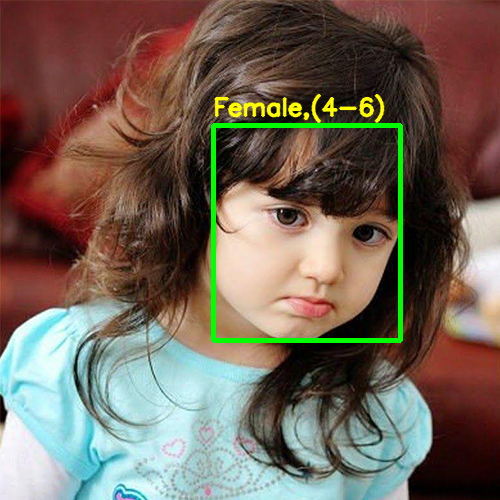

In [25]:
input = cv.imread("2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

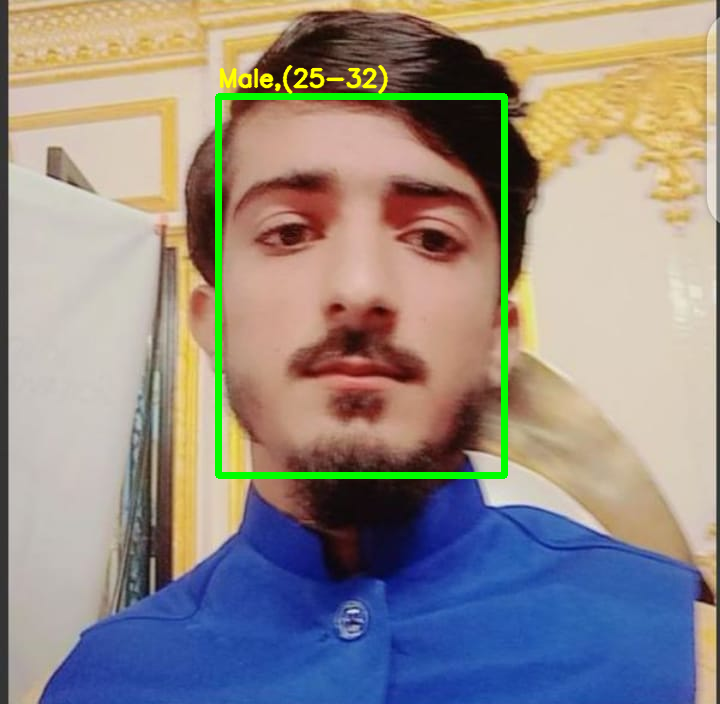

In [28]:
input = cv.imread("7.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

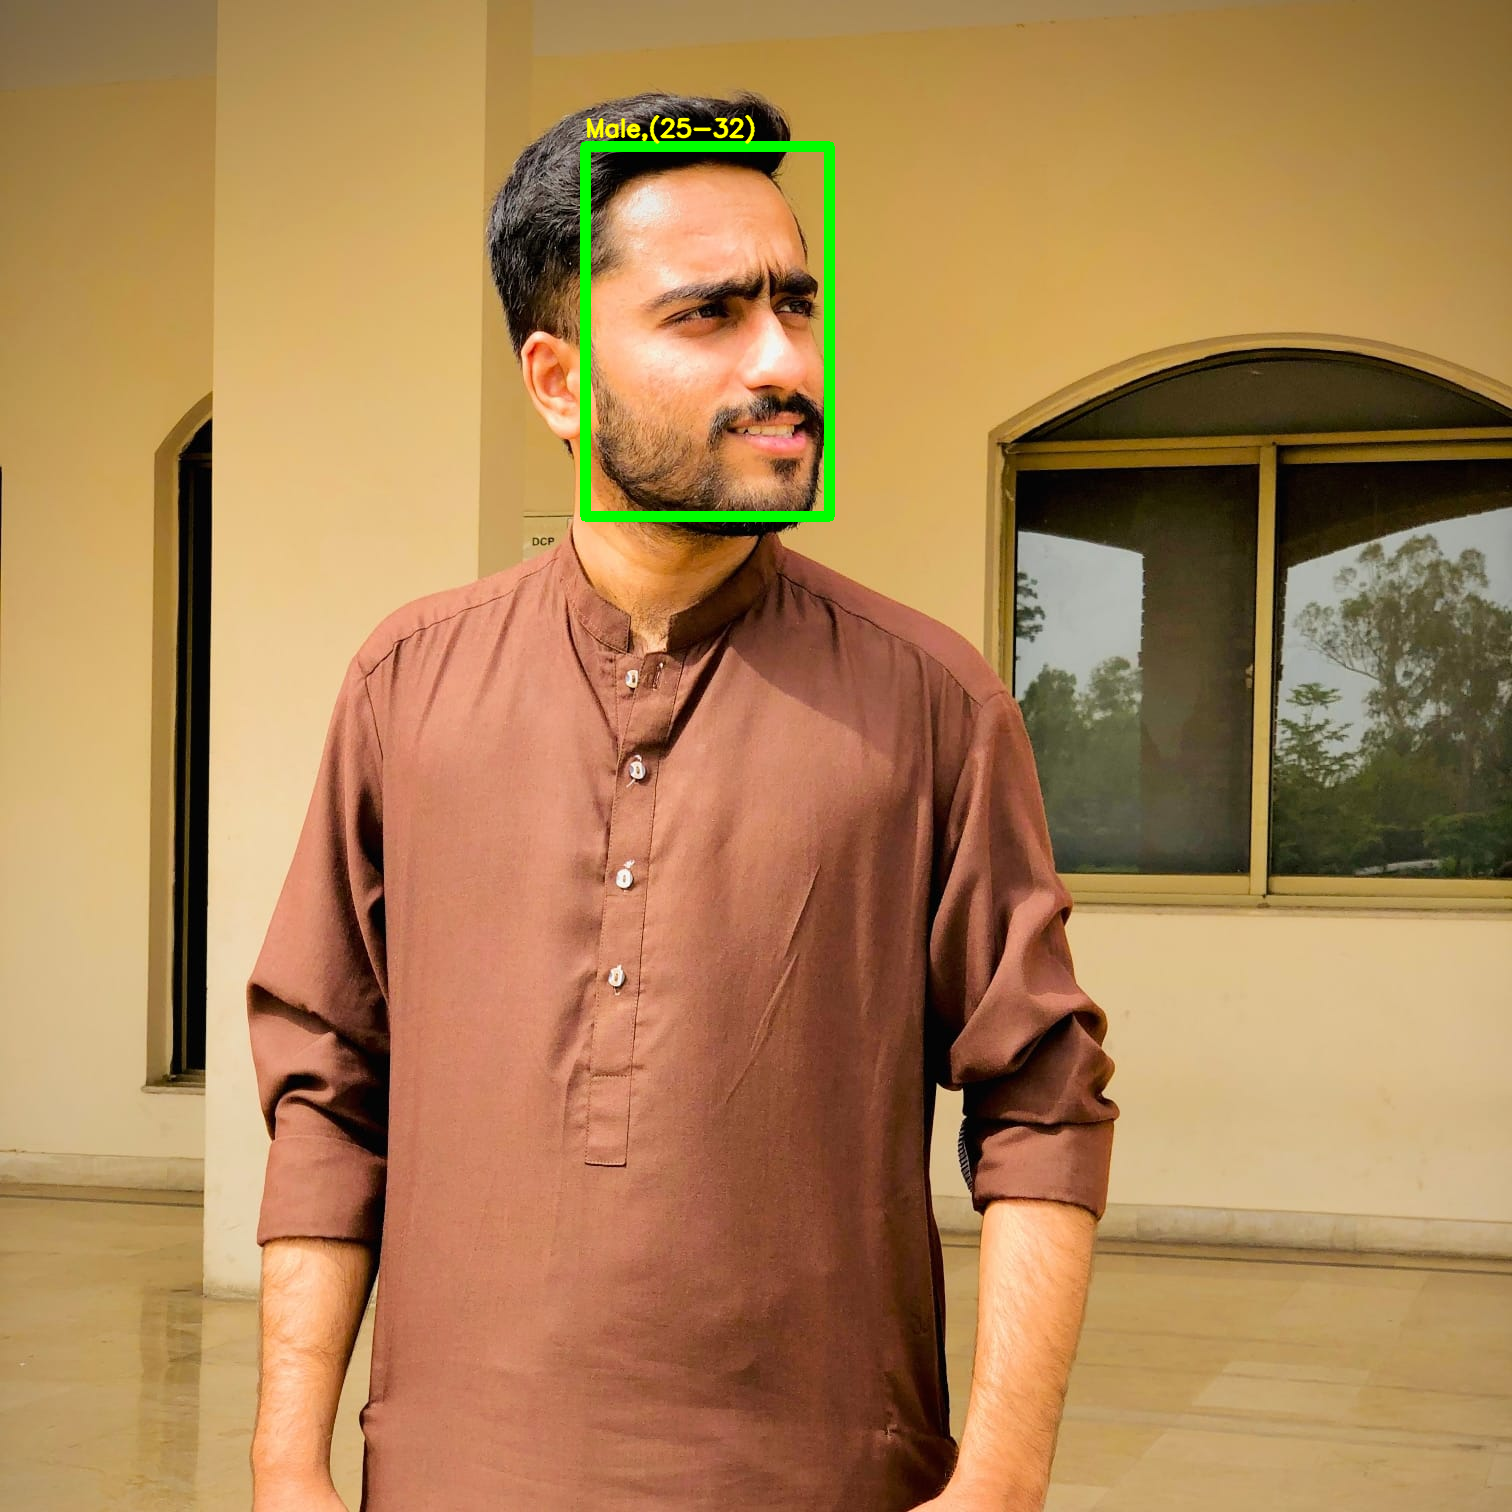

In [29]:
input = cv.imread("8.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

In [ ]:
input = cv.imread("9.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

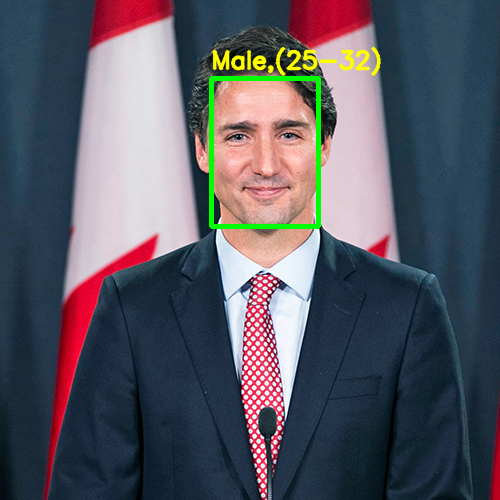

In [26]:
input = cv.imread("3.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

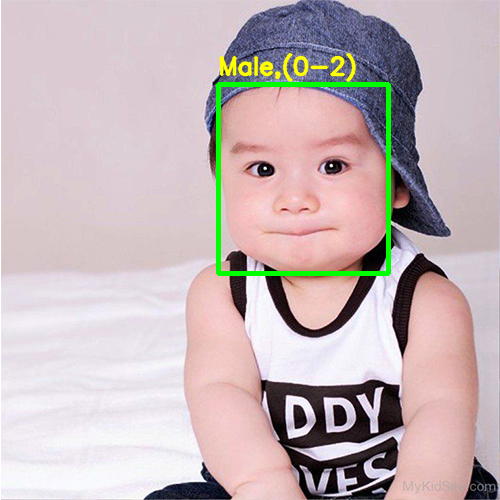

In [ ]:
input = cv.imread("4.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

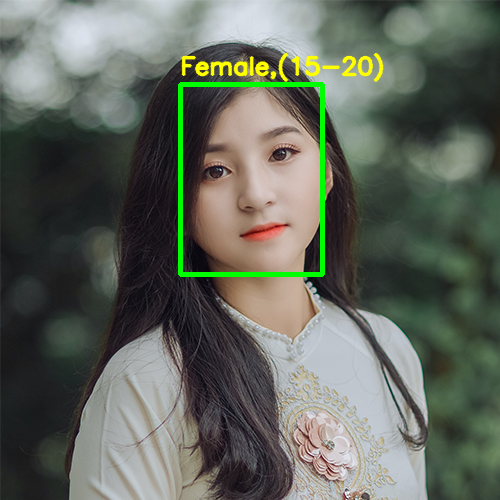

In [27]:
input = cv.imread("5.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

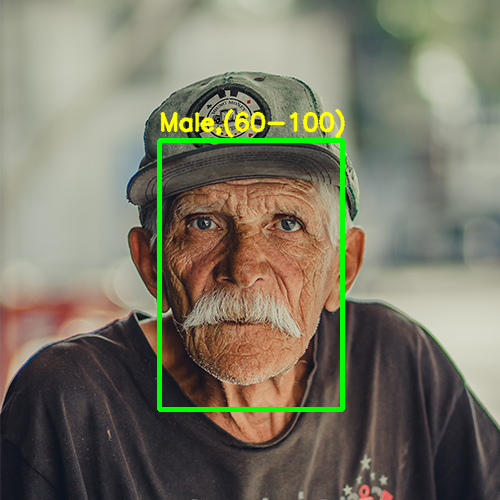

In [ ]:
input = cv.imread("6.jpg")
output = age_gender_detector(input)
cv2_imshow(output)